# DATA PREVIEW
import dependencies

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

Import data

import the precompiled data from the physionet database and format to a CSV for use in models.

In [4]:
extractdata = open("physionet.org/files/apnea-ecg/1.0.0/additional-information.txt", "r")
file = open("data.csv", "w")
extractdata.seek(1271)
for i in extractdata.readlines(1):
    data = i.replace('\t', ',')
    print(data)
    file.write(data)
extractdata.seek(1385)
for i in extractdata.readlines():
    data = i.replace('\t\t', '')
    redata = data.replace('\t', ',')
    print(redata)
    file.write(redata)
file.close()

FileNotFoundError: [Errno 2] No such file or directory: 'physionet.org/files/apnea-ecg/1.0.0/additional-information.txt'

Display apnea data

In [ ]:
data_frame = pd.read_csv("data.csv")
data_frame.head()

,Record,Length,non-apn,apnea,hours,AI,HI,AHI,Age,Sex,height,weight
0,a01,490,20,470,9,12.5,57.1,69.6,51,M,175,102
1,a02,529,109,420,9,57.2,12.3,69.5,38,M,180,120
2,a03,520,274,246,9,38.4,0.7,39.1,54,M,168,80
3,a04,493,40,453,9,73.4,4.0,77.4,52,M,173,121
4,a05,455,179,276,8,35.0,6.0,41.0,58,M,176,78


plot apnea data

<Axes: >

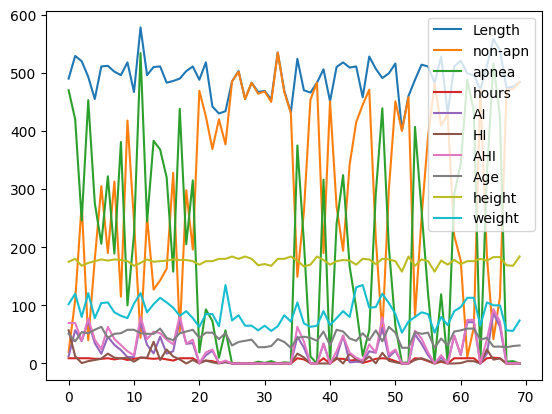

In [ ]:
data_frame.plot()

Display distribution of apnea data

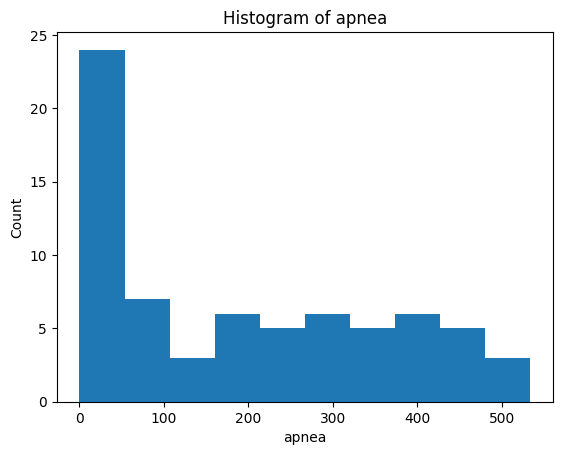

In [ ]:
plt.hist(data_frame['apnea'])
plt.title(f"Histogram of {data_frame['apnea'].name}")
plt.ylabel('Count')
plt.xlabel(f'{data_frame["apnea"].name}')
plt.show()

# DATA WRANGLING
import dependencies

In [ ]:
import pandas as pd

read data to variable

In [ ]:
data_frame = pd.read_csv('data.csv')

check if data values are null

In [ ]:
data_frame.isnull().sum()

Record     0
Length     0
non-apn    0
apnea      0
hours      0
AI         0
HI         0
AHI        0
Age        0
Sex        0
height     0
weight     0
dtype: int64

check if data values contain duplicates

In [ ]:
data_frame.duplicated().sum()

np.int64(0)

identify unique sexes

In [ ]:
data_frame['Sex'].unique()

array(['M', 'F'], dtype=object)

convert height from centimeters to meters

In [ ]:
data_frame['height'] = data_frame['height']/100
print(data_frame['height'])

0     1.75
1     1.80
2     1.68
3     1.73
4     1.76
      ... 
65    1.83
66    1.83
67    1.69
68    1.68
69    1.84
Name: height, Length: 70, dtype: float64


generate BMI from height and weight values

In [ ]:
data_frame['BMI'] = data_frame['weight'] / (data_frame['height'] * data_frame['height'])
print(data_frame['BMI'])

0     33.306122
1     37.037037
2     28.344671
3     40.429015
4     25.180785
        ...    
65    29.860551
66    29.860551
67    19.957284
68    19.841270
69    21.857278
Name: BMI, Length: 70, dtype: float64


describe AHI distribution

In [ ]:
print(data_frame['AHI'].describe())
Q1 = data_frame['AHI'].quantile(0.25)
Q3 = data_frame['AHI'].quantile(0.75)
IQR = Q3 - Q1
print(f'Outliers are a BP above {Q3 + IQR * 1.5} or below {Q1 - IQR * 1.5}')

count    70.000000
mean     28.047571
std      27.537779
min       0.000000
25%       0.130000
50%      21.000000
75%      42.750000
max      93.500000
Name: AHI, dtype: float64
Outliers are a BP above 106.67999999999999 or below -63.79999999999999


describe BMI distribution

In [ ]:
print(data_frame['BMI'].describe())
Q1 = data_frame['BMI'].quantile(0.25)
Q3 = data_frame['BMI'].quantile(0.75)
IQR = Q3 - Q1
print(f'Outliers are a BP above {Q3 + IQR * 1.5} or below {Q1 - IQR * 1.5}')

count    70.000000
mean     28.013456
std       6.481346
min      19.198960
25%      21.950224
50%      27.440599
75%      33.172600
max      45.328720
Name: BMI, dtype: float64
Outliers are a BP above 50.0061644474454 or below 5.116659564324603


scale AHI features to decimal values between 0 and 1

In [ ]:
scale_feature = 'AHI'

#the minimum value with space for outliers
MIN_AHI = 0

#the maximum value with space for outliers
MAX_AHI = 100

#scale features
data_frame[scale_feature] = [(X - MIN_AHI) / (MAX_AHI - MIN_AHI) for X in data_frame[scale_feature]]

data_frame.describe()

,Length,non-apn,apnea,hours,AI,HI,AHI,Age,height,weight,BMI
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,491.828571,305.171429,186.657143,5.085714,21.858000,6.189571,0.280476,45.142857,1.758429,86.757143,28.013456
std,31.576441,156.571692,172.275385,3.899992,24.101227,9.423092,0.275378,10.837784,0.055889,20.730455,6.481346
min,401.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.580000,53.000000,19.198960
25%,470.250000,180.750000,3.250000,0.000000,0.030000,0.000000,0.001300,38.000000,1.715000,69.750000,21.950224
50%,496.000000,320.500000,178.000000,6.500000,14.200000,3.500000,0.210000,44.000000,1.770000,85.000000,27.440599
75%,511.000000,453.250000,323.500000,9.000000,34.750000,8.900000,0.427500,53.750000,1.797500,102.000000,33.172600
max,578.000000,535.000000,534.000000,10.000000,86.800000,57.100000,0.935000,63.000000,1.840000,135.000000,45.328720


scale BMI features to decimal values between 0 and 1

In [ ]:
scale_feature = 'BMI'

#the minimum value with space for outliers
MIN_BMI = 17

#the maximum value with space for outliers
MAX_BMI = 48

#scale features
data_frame[scale_feature] = [(X - MIN_BMI) / (MAX_BMI - MIN_BMI) for X in data_frame[scale_feature]]

data_frame.describe()

,Length,non-apn,apnea,hours,AI,HI,AHI,Age,height,weight,BMI
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,491.828571,305.171429,186.657143,5.085714,21.858000,6.189571,0.280476,45.142857,1.758429,86.757143,0.355273
std,31.576441,156.571692,172.275385,3.899992,24.101227,9.423092,0.275378,10.837784,0.055889,20.730455,0.209076
min,401.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.580000,53.000000,0.070934
25%,470.250000,180.750000,3.250000,0.000000,0.030000,0.000000,0.001300,38.000000,1.715000,69.750000,0.159685
50%,496.000000,320.500000,178.000000,6.500000,14.200000,3.500000,0.210000,44.000000,1.770000,85.000000,0.336794
75%,511.000000,453.250000,323.500000,9.000000,34.750000,8.900000,0.427500,53.750000,1.797500,102.000000,0.521697
max,578.000000,535.000000,534.000000,10.000000,86.800000,57.100000,0.935000,63.000000,1.840000,135.000000,0.913830


save data to csv

In [ ]:
data_frame.to_csv('wrangled_data.csv', index=False)